In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
negativeQuestions = ["[I dislike singing]", "[I do not find karaoke amusing]", "[The time goes very slow when I do karaoke]", "[I feel bored]", "[I prefer karaoke without any effects]", "[I quickly get exhausted by new technologies]", "[I do not like karaoke]"]

def depolarize(s):
    out = [5 - int(item) + 1 for item in s]
    return out

def adjust(dataframe):
    dataframe.replace({ "Completely agree" : 5,
                        "Somewhat agree" : 4,
                        "Neutral" : 3,
                        "Somewhat disagree" : 2,
                        "Completely disagree" : 1 }, inplace=True)

    dataframe.drop(columns=["Timestamp"], inplace=True)
    
    dataframe[negativeQuestions] = dataframe[negativeQuestions].apply(depolarize)
    dataframe = dataframe.drop(columns=["Name"]).join(dataframe["Name"])

    renameDict = {index : dataframe["Name"][index] for index in range(len(dataframe["Name"]))}
    dataframe = dataframe.rename(index=renameDict).drop(columns=["Name"])
    
    return dataframe

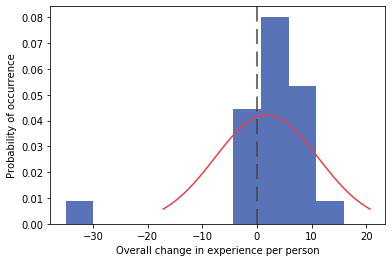

In [7]:
resWithout = pd.read_excel("results.xlsx", "without")
resWith = pd.read_excel("results.xlsx", "with")

resWithout, resWith = (adjust(resWithout), adjust(resWith))

differences = resWith.sum(axis=1) - resWithout.sum(axis=1)

mu = differences.mean()
variance = differences.var()
sigma = differences.std()
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color="#E44047")
plt.axvline(x=0, color="#444444").set_dashes([10, 5])
plt.hist(differences, density=True, bins=10, color="#5873B8")
plt.xlabel("Overall change in experience per person")
plt.ylabel("Probability of occurrence")
plt.show()